In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
train = pd.read_csv('../raw_data/train.csv', index_col = 0)
test = pd.read_csv('../raw_data/test.csv', index_col = 0)

train.describe()

song_duration_ms  acousticness  danceability        energy  \
count      35899.000000  36008.000000  35974.000000  36025.000000   
mean      193165.847572      0.276404      0.570951      0.683932   
std        45822.127679      0.297928      0.190010      0.212662   
min        25658.000000     -0.013551      0.043961     -0.001682   
25%       166254.500000      0.039618      0.424760      0.539276   
50%       186660.000000      0.140532      0.608234      0.704453   
75%       215116.000000      0.482499      0.718464      0.870503   
max       491671.000000      1.065284      0.957131      1.039741   

       instrumentalness           key      liveness      loudness  \
count      36015.000000  35935.000000  35914.000000  36043.000000   
mean           0.036527      5.042605      0.198514     -7.407596   
std            0.150024      3.372728      0.151670      3.877198   
min           -0.004398      0.000000      0.027843    -32.117911   
25%            0.000941      2.000000      0.111796     -9.578139   
50%            0.001974      5.000000      0.135945     -6.345413   
75%            0.003225      8.000000      0.212842     -4.620711   
max            1.075415     11.000000      1.065298     -0.877346   

         audio_mode   speechiness         tempo  time_signature  \
count  40000.000000  40000.000000  40000.000000    40000.000000   
mean       0.321150      0.094107    116.562815        3.394375   
std        0.466924      0.083591     26.167911        0.524405   
min        0.000000      0.015065     62.055779        2.000000   
25%        0.000000      0.038500     96.995309        3.000000   
50%        0.000000      0.055881    113.795959        3.000000   
75%        1.000000      0.118842    128.517383        4.000000   
max        1.000000      0.560748    219.163578        5.000000   

       audio_valence  song_popularity  
count   40000.000000     40000.000000  
mean        0.580645         0.364400  
std         0.237351         0.481268  
min         0.013398         0.000000  
25%         0.398669         0.000000  
50%         0.598827         0.000000  
75%         0.759635         1.000000  
max         1.022558         1.000000

First let's look at some correlations:

<AxesSubplot:>

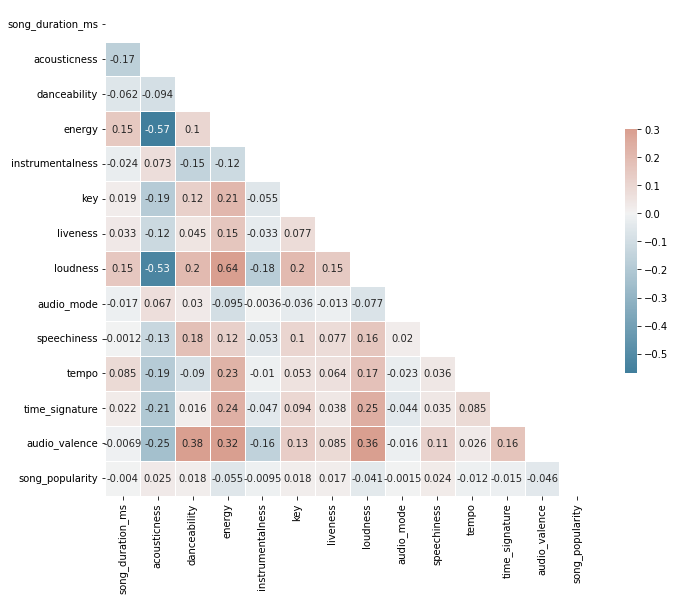

In [9]:

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


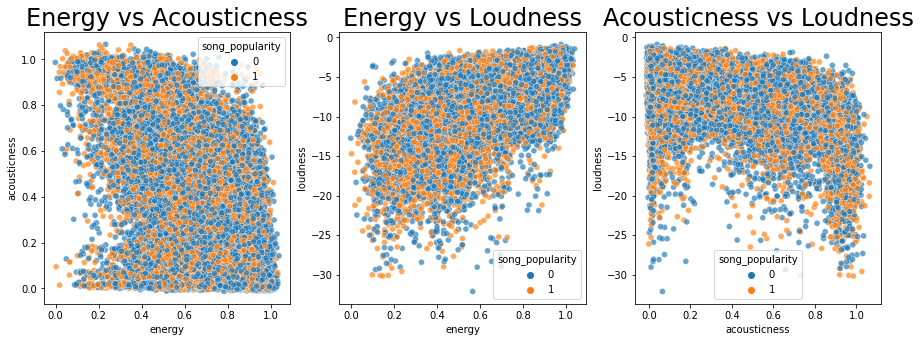

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('Energy vs Acousticness',  fontsize=24)
sns.scatterplot(x='energy', y='acousticness', data=train, hue='song_popularity', ax=ax[0], alpha=.67)

ax[1].set_title('Energy vs Loudness',  fontsize=24)
sns.scatterplot(x='energy', y='loudness', data=train, hue='song_popularity', ax=ax[1], alpha=.67)


ax[2].set_title('Acousticness vs Loudness',  fontsize=24)
sns.scatterplot(x='acousticness', y='loudness', data=train, hue='song_popularity', ax=ax[2], alpha=.67)

plt.show()

Energy, loudness and acousticness are high correlated (or anti-correlated). These correlations might have to be taken into account later but they don't seem to be informative by themselves of the popularity.

<AxesSubplot:xlabel='song_popularity', ylabel='Count'>

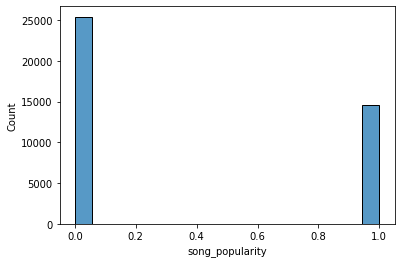

In [15]:
sns.histplot(train,x = 'song_popularity')

Slight imbalance to maybe take into account at some point.

**What about missign data?**

We know that there arem issing data in the set.

<AxesSubplot:xlabel='id'>

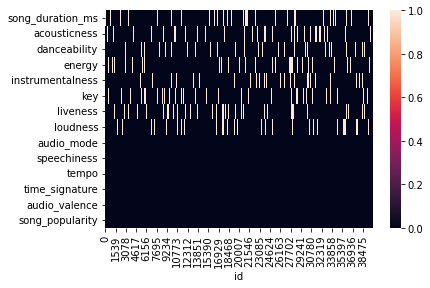

In [17]:
sns.heatmap(train.isna().transpose())

In [22]:
missing_cols = [col for col in train.columns if train[col].isna().sum() > 0]

Note all the features have missing data. To find a strategy to replace the missing data itm ight be interesting to look at the distribution of the variables having missing data.

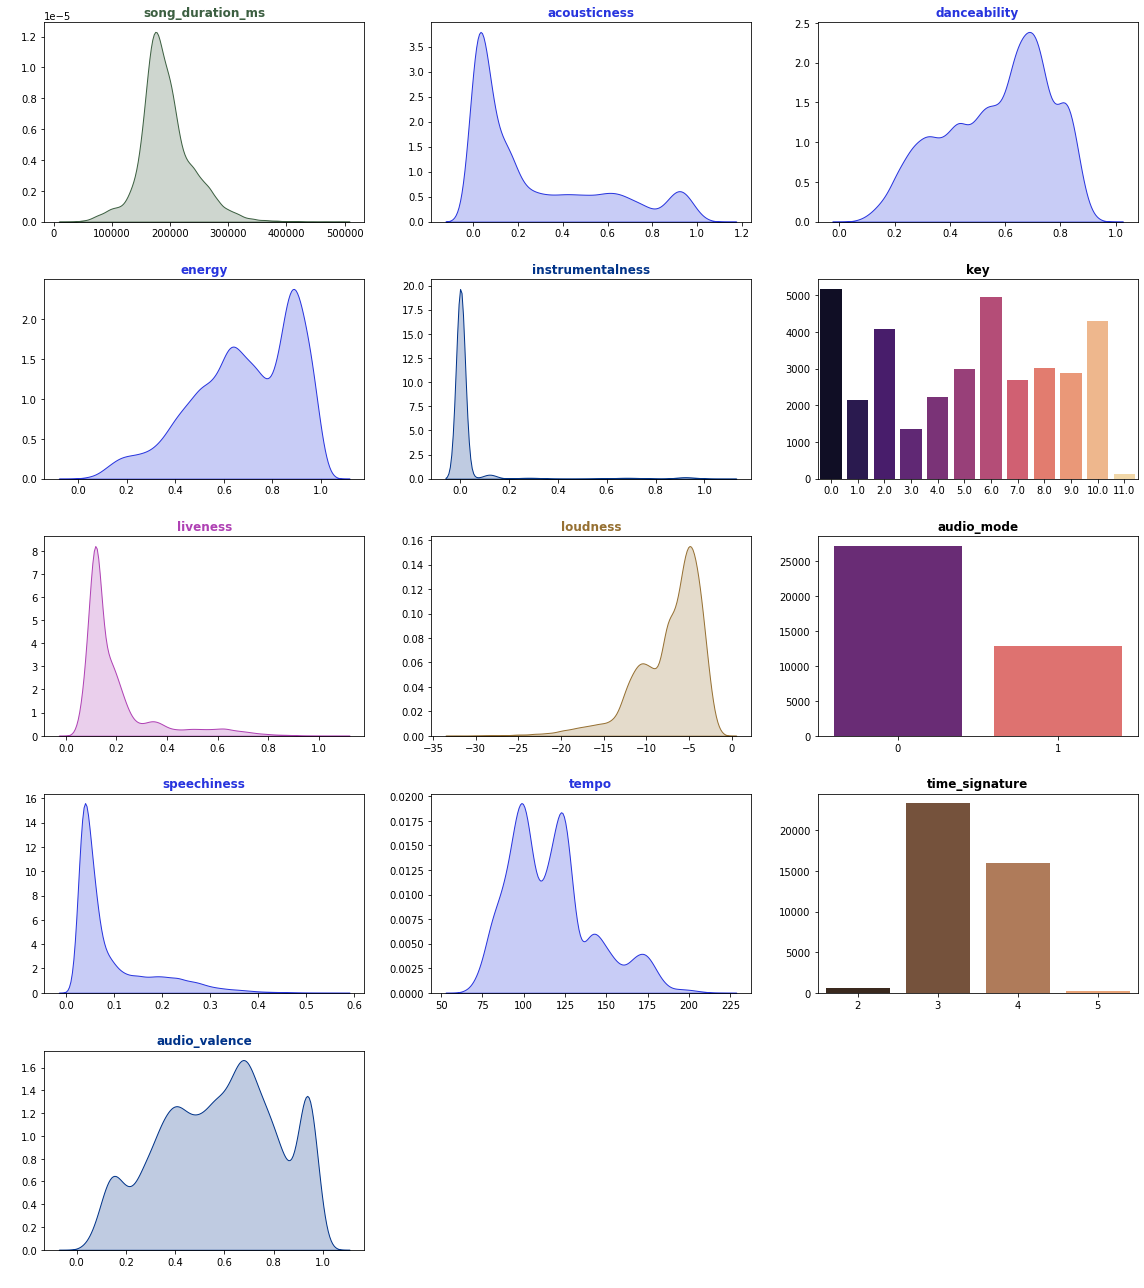

In [21]:
import random as random
useful_cols = [col for col in train.columns if col not in ['id', 'song_popularity']]
cols_dist = [col for col in useful_cols if col not in ['key', 'audio_mode', 'time_signature']]
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['magma', 'copper', 'crest']


plt.figure(figsize= (16,18))
for i,col in enumerate(train[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,3, i+1)
    if col in cols_dist:
        
        sns.kdeplot(train[col], color = rand_col, fill = rand_col )
        plt.title(col,weight = 'bold', color = rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = train , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
        
plt.tight_layout()
plt.show();

Instrumentalness is very right skewed! 
Now, let's focus on only the features with missing data.

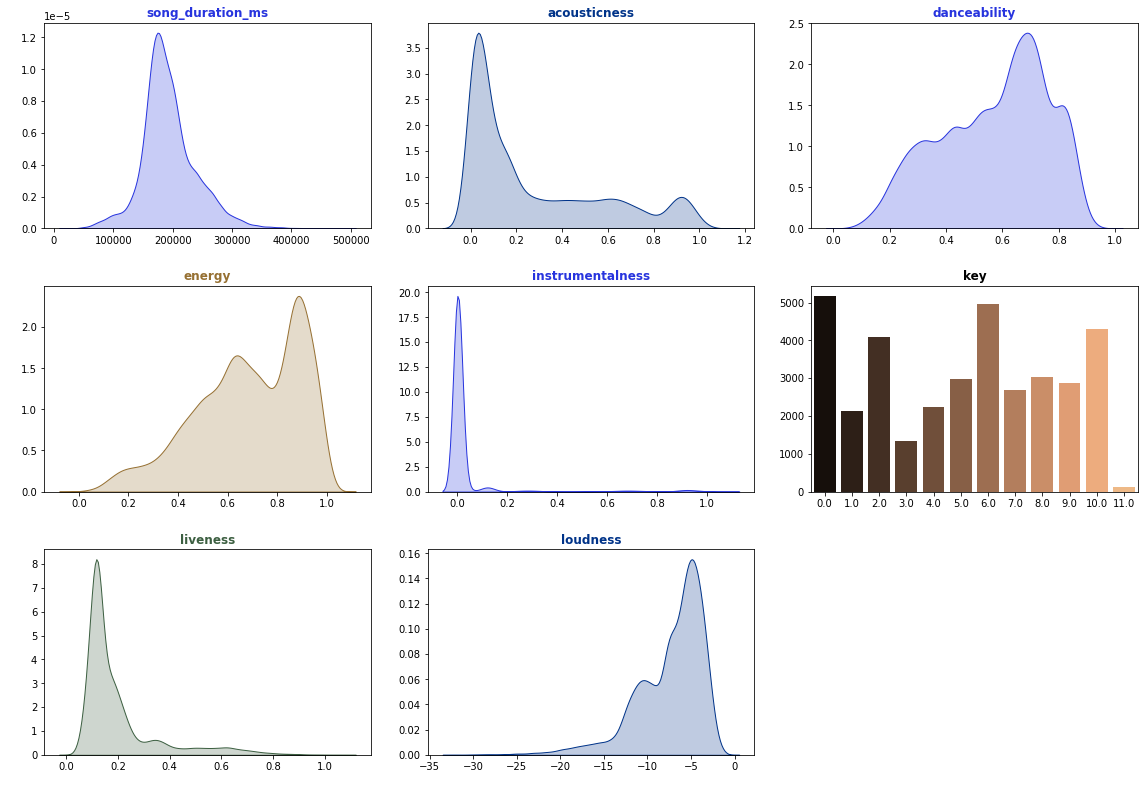

In [23]:

plt.figure(figsize= (16,18))
for i,col in enumerate(train[missing_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,3, i+1)
    if col in cols_dist:
        
        sns.kdeplot(train[col], color = rand_col, fill = rand_col )
        plt.title(col,weight = 'bold', color = rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = train , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
        
plt.tight_layout()
plt.show();

The question is by what should we replace the missing data? The mean or the median? It probably depends on the distribution of the feature.

## Feature-Feature interaction

Let's see if there is a way to have some relation between features and target

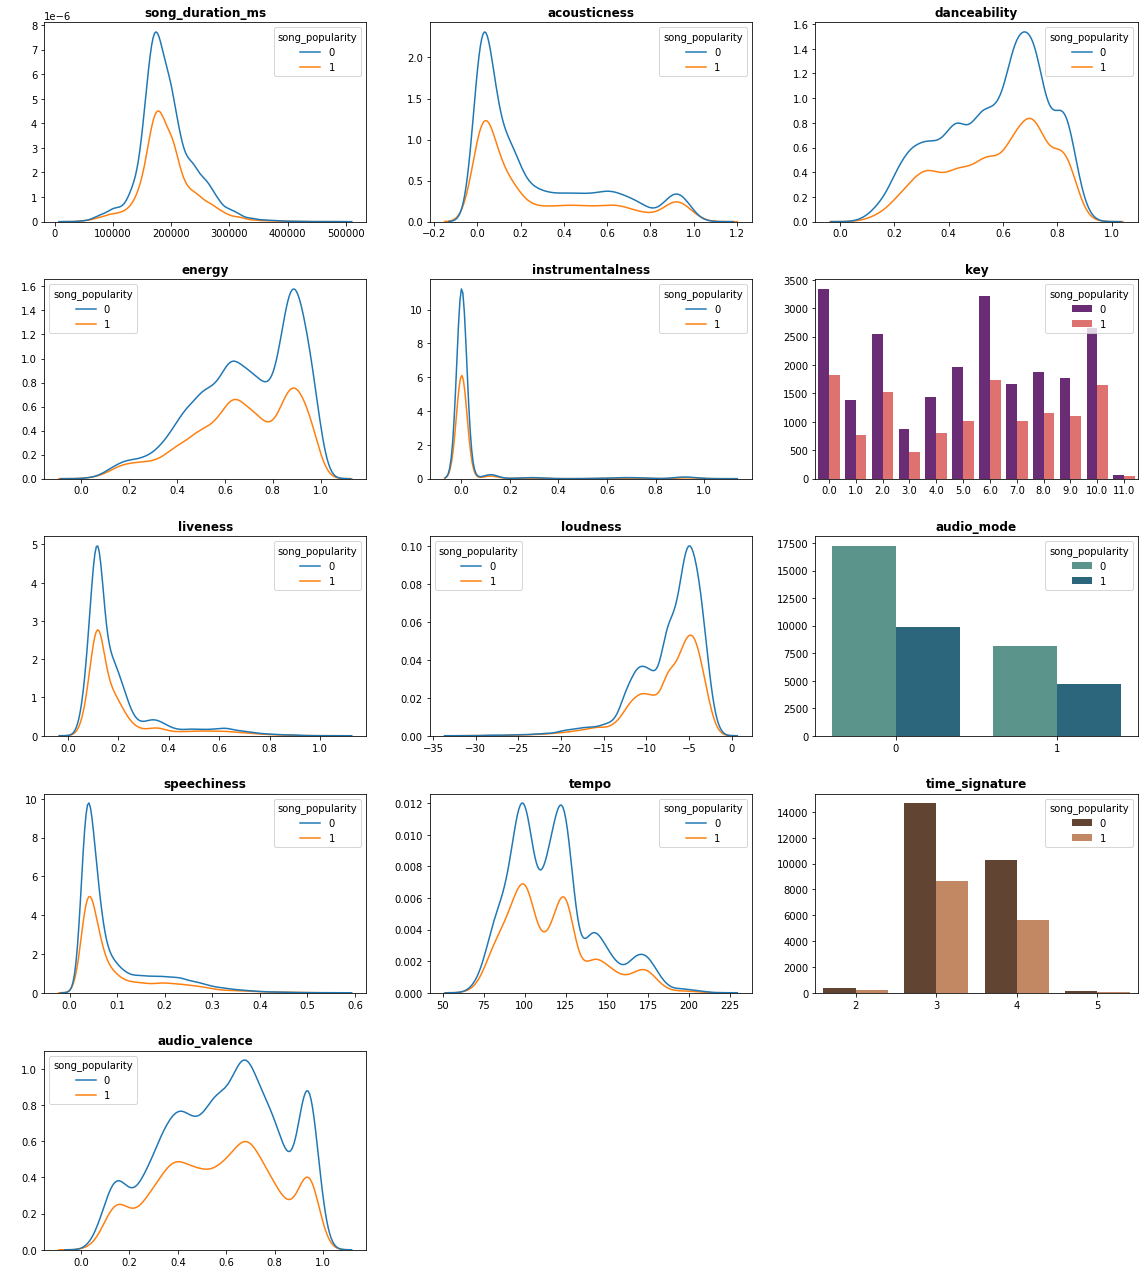

In [30]:

plt.figure(figsize= (16,18))
for i,col in enumerate(train[useful_cols].columns):
    plt.subplot(5,3, i+1)
    if col in cols_dist:
        
        sns.kdeplot(data = train, x = col, hue = 'song_popularity')
        plt.title(col,weight = 'bold')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = train , x = col, hue = 'song_popularity',palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
        
plt.tight_layout()
plt.show();

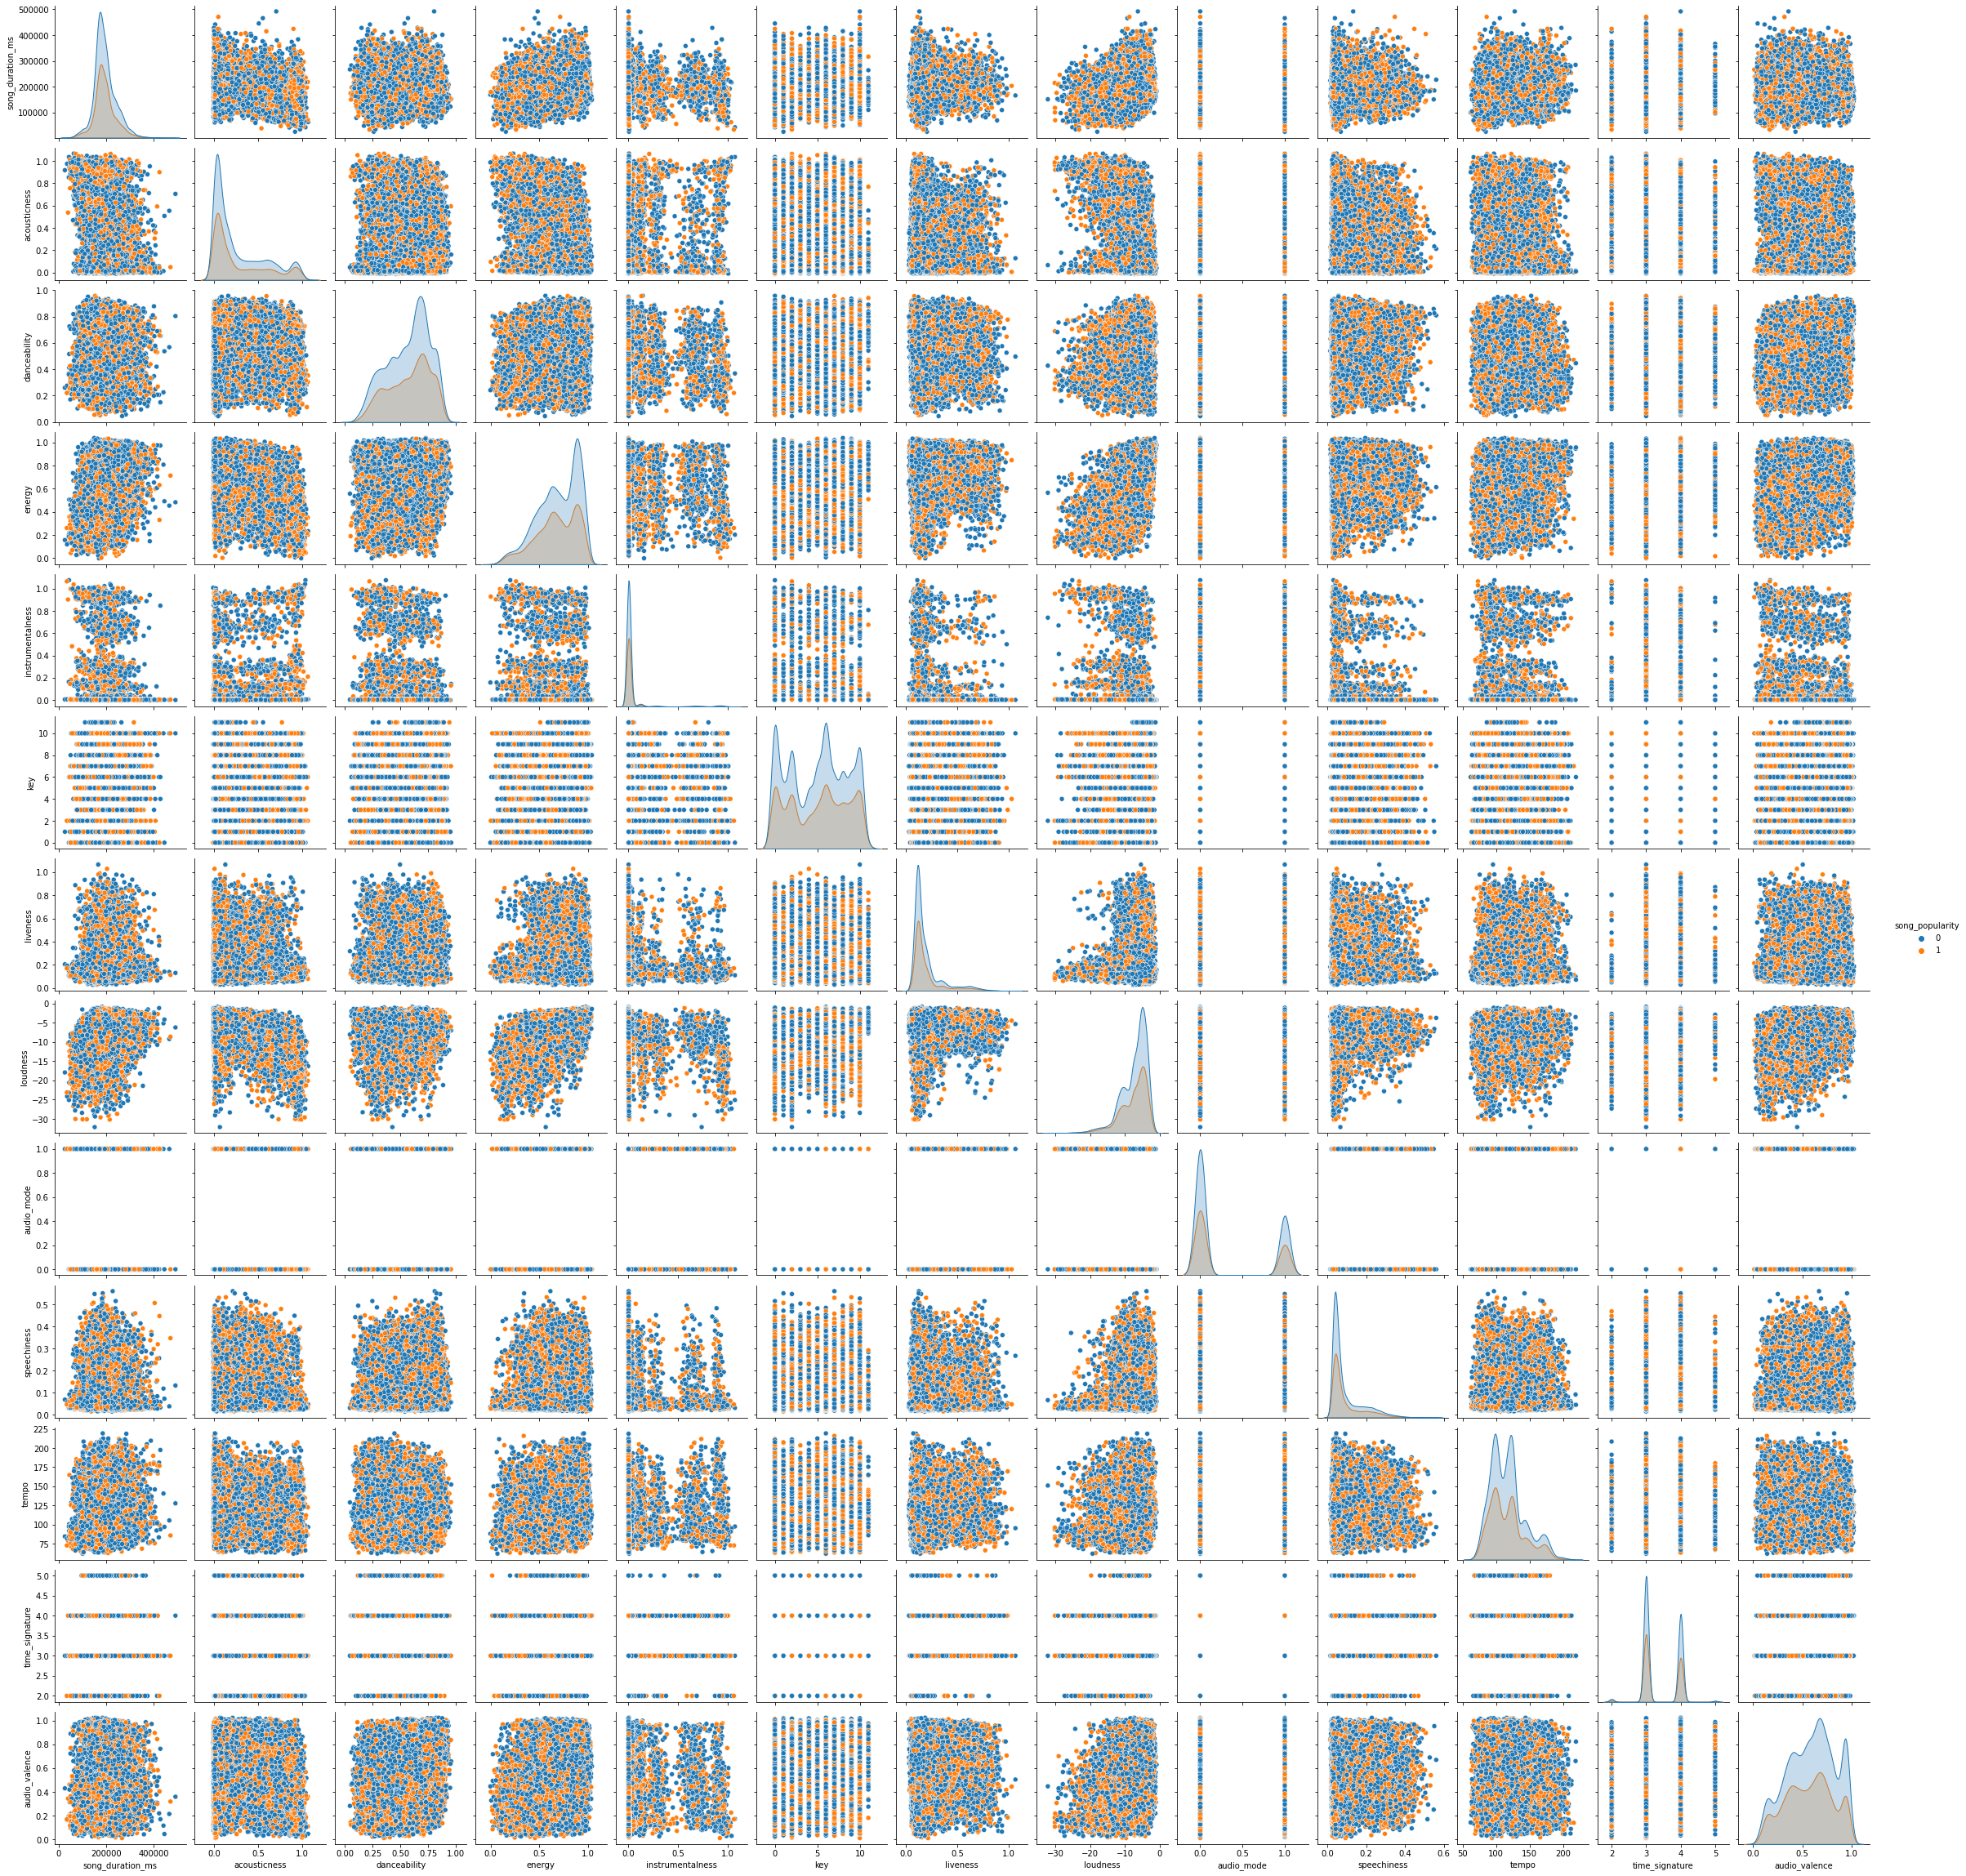

In [31]:
sns.pairplot(data = train,hue = 'song_popularity')

## PCA decomposition

Let's try the PCA decomposition on the data just to get a hint on how things could work. As PCA doesn't work well with missing data by default, let's just replace all missing by the median of the distribution.

In [32]:
for col in missing_cols:
    train[col].fillna(train[col].median(), inplace = True)


In [35]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(train[useful_cols])
pca_train = pca.transform(train[useful_cols])

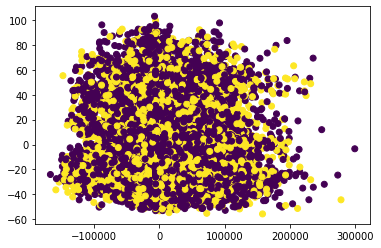

In [37]:
plt.scatter(pca_train[:,0], pca_train[:,1], c = train['song_popularity'], cmap = 'viridis')

/tmp/ipykernel_878/2257160120.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


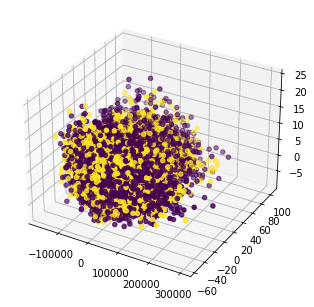

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter(pca_train[:,0], pca_train[:,1],pca_train[:,2], c = train['song_popularity'], cmap = 'viridis')